In [1]:
from nltk.tokenize import word_tokenize
text1 = "It's true that the chicken was the best bamboozler in the known multiverse."
tokens = word_tokenize(text1)
print(tokens)

['It', "'s", 'true', 'that', 'the', 'chicken', 'was', 'the', 'best', 'bamboozler', 'in', 'the', 'known', 'multiverse', '.']


In [2]:
from spacy.en import English
parser = English()
print(parser)

ModuleNotFoundError: No module named 'spacy.en'

In [26]:
import pandas as pd

In [4]:

from sklearn.preprocessing import normalize


In [218]:

df = pd.read_csv(r'C:\Users\akhta\Downloads\EditedNewData.csv')
print(df.head())

   USER_ID    SENT_AT  NPS_SCORE  \
0   2738.0  3/12/2018        9.0   
1   2190.0  3/12/2018       10.0   
2   4390.0  3/12/2018        5.0   
3   4209.0  3/12/2018       10.0   
4   3247.0  3/12/2018       10.0   

                                         NPS_COMMENT MAILBOX_TYPE  IsGmail  \
0  Will definitely recommend this tool to my sale...        Gmail        1   
1                                                NaN        Gmail        1   
2                                                NaN      Outlook        0   
3  love the email template feature to fill in nam...        Gmail        1   
4                                      yesware rocks        Gmail        1   

  ACCOUNT_MANAGER  HasAccountMgr   COUNTRY_TYPE  USA  EMPLOYEE_COUNT  \
0           False              0  International    0           650.0   
1            True              1  International    0             NaN   
2           False              0  United States    1           120.0   
3           False         

In [205]:
print((df['NPS_COMMENT'][:6]))

0    Will definitely recommend this tool to my sale...
1                                                  NaN
2                                                  NaN
3    love the email template feature to fill in nam...
4                                        yesware rocks
5    easy tool for tracking and send mass emails on...
Name: NPS_COMMENT, dtype: object


In [208]:
reviews = open(r'C:\Users\akhta\Downloads\Marketing_Analytics\Comments.csv',errors='ignore').read()

reviews_list = reviews.split('\n')[1:-1]
print(reviews_list[:1000])

0       Will definitely recommend this tool to my sale...
1                                                     NaN
2                                                     NaN
3       love the email template feature to fill in nam...
4                                           yesware rocks
5       easy tool for tracking and send mass emails on...
6                                                     NaN
7       couple of things could be improved and some un...
8                email tracking doesnt work half the time
9                             UI can be clunky in Google.
10                 It works really well and saves me time
11                                                    NaN
12                                    Not always accurate
13                                          Functionality
14                                      Ease of tracking.
15                                                    NaN
16      The Cadence management feels clunky still- if ...
17      As an 

AttributeError: 'Series' object has no attribute 'split'

In [147]:
rl=[]

for i in reviews_list:
    if i!='':
        rl.append(i)
        
reviews_list=rl

In [6]:
import contractions

In [148]:
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

reviews = replace_contractions(str(reviews_list))
reviews[:]

'[\'Will definitely recommend this tool to my sales colleagues.\', \'love the email template feature to fill in names and other info!\', \'yesware rocks\', \'easy tool for tracking and send mass emails on a small scale - perfect when working with clients.\', \'couple of things could be improved and some uncertainty on way things work.\',  themail tracking does not work half the time\', \'UI can be clunky in Google.\', \'It works really well and saves me time\', \'Not always accurate\', \'Functionality\', \'Ease of tracking.\', \'The Cadence management feels clunky still- if this was better it would be higher.\', \'"As an administrator, it\\\'s just a bit clunky. I also don\\\'t have a good idea of what\\\'s being used and success rates."\', \'-\', \'It constantly disconnects from my gmail account in Chrome browser.\',  wouldo not find it as useful in my accounts. Sometimes can be a hindrance as their security picks up that we are tracking\', \'works well - does its job\', \'"All of the

In [8]:
import nltk
import re, string, unicodedata
import inflect

from nltk.stem import LancasterStemmer, WordNetLemmatizer

In [153]:
#make sure text is compliant with standard utf-8 encoding
words = nltk.word_tokenize(reviews)

#take out characters that are not ascii
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

#change all characters to lowercase
def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

#remove punctuation
def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

#change numeric numbers to text of numbers
def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

#remove stopwords
def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords.words('english'):
            new_words.append(word)
    return new_words

#stem words
def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

#lemmatize words
def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

#apply functions above
def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = replace_numbers(words)
    words = remove_stopwords(words)

    return words

words = normalize(words)
print (words[:1000])

['definitely', 'recommend', 'tool', 'sales', 'colleagues', 'love', 'email', 'template', 'feature', 'fill', 'names', 'info', 'yesware', 'rocks', 'easy', 'tool', 'tracking', 'send', 'mass', 'emails', 'small', 'scale', 'perfect', 'working', 'clients', 'couple', 'things', 'could', 'improved', 'uncertainty', 'way', 'things', 'work', 'themail', 'tracking', 'work', 'half', 'time', 'ui', 'clunky', 'google', 'works', 'really', 'well', 'saves', 'time', 'always', 'accurate', 'functionality', 'ease', 'tracking', 'cadence', 'management', 'feels', 'clunky', 'still', 'better', 'would', 'higher', 'administrator', 'bit', 'clunky', 'also', 'dont', 'good', 'idea', 'used', 'success', 'rates', 'constantly', 'disconnects', 'gmail', 'account', 'chrome', 'browser', 'wouldo', 'find', 'useful', 'accounts', 'sometimes', 'hindrance', 'security', 'picks', 'tracking', 'works', 'well', 'job', 'individual', 'parts', 'make', 'service', 'fit', 'together', 'seamlessly', 'using', 'one', 'part', 'another', 'extremely', 'u

In [154]:
Freq= (dict((i, words.count(i)) for i in words))
print(Freq)

{'definitely': 15, 'recommend': 32, 'tool': 166, 'sales': 126, 'colleagues': 18, 'love': 201, 'email': 538, 'template': 44, 'feature': 75, 'fill': 4, 'names': 1, 'info': 22, 'yesware': 385, 'rocks': 3, 'easy': 195, 'tracking': 340, 'send': 86, 'mass': 16, 'emails': 486, 'small': 12, 'scale': 2, 'perfect': 10, 'working': 37, 'clients': 54, 'couple': 10, 'things': 33, 'could': 97, 'improved': 8, 'uncertainty': 1, 'way': 81, 'work': 160, 'themail': 37, 'half': 9, 'time': 201, 'ui': 32, 'clunky': 26, 'google': 20, 'works': 190, 'really': 93, 'well': 106, 'saves': 13, 'always': 56, 'accurate': 42, 'functionality': 88, 'ease': 115, 'cadence': 6, 'management': 13, 'feels': 8, 'still': 59, 'better': 86, 'would': 236, 'higher': 12, 'administrator': 1, 'bit': 33, 'also': 104, 'dont': 89, 'good': 159, 'idea': 8, 'used': 53, 'success': 11, 'rates': 13, 'constantly': 8, 'disconnects': 2, 'gmail': 118, 'account': 21, 'chrome': 25, 'browser': 16, 'wouldo': 1, 'find': 54, 'useful': 131, 'accounts': 9,

In [156]:
import csv
csvfile = r"C:\Users\akhta\Downloads\Marketing_Analytics\Words.csv"

#Assuming res is a flat list
with open(csvfile, "w") as output:
    writer = csv.writer(output, lineterminator='\n')
    for val in Freq:
        writer.writerow([val])    



In [23]:
import csv

In [157]:
with open(csvfile, "w") as f:
    w = csv.DictWriter(f, Freq.keys())
    w.writeheader()
    w.writerow(Freq)

In [158]:
pos_sent = open(r"C:\Users\akhta\Downloads\positive.txt").read()
positive_words=pos_sent.split('\n')
positive_words=[w.strip() for w in positive_words]

neg_sent = open(r"C:\Users\akhta\Downloads\negative.txt").read()
negative_words=neg_sent.split('\n')
negative_words=[w.strip() for w in negative_words]

In [159]:
words

['definitely',
 'recommend',
 'tool',
 'sales',
 'colleagues',
 'love',
 'email',
 'template',
 'feature',
 'fill',
 'names',
 'info',
 'yesware',
 'rocks',
 'easy',
 'tool',
 'tracking',
 'send',
 'mass',
 'emails',
 'small',
 'scale',
 'perfect',
 'working',
 'clients',
 'couple',
 'things',
 'could',
 'improved',
 'uncertainty',
 'way',
 'things',
 'work',
 'themail',
 'tracking',
 'work',
 'half',
 'time',
 'ui',
 'clunky',
 'google',
 'works',
 'really',
 'well',
 'saves',
 'time',
 'always',
 'accurate',
 'functionality',
 'ease',
 'tracking',
 'cadence',
 'management',
 'feels',
 'clunky',
 'still',
 'better',
 'would',
 'higher',
 'administrator',
 'bit',
 'clunky',
 'also',
 'dont',
 'good',
 'idea',
 'used',
 'success',
 'rates',
 'constantly',
 'disconnects',
 'gmail',
 'account',
 'chrome',
 'browser',
 'wouldo',
 'find',
 'useful',
 'accounts',
 'sometimes',
 'hindrance',
 'security',
 'picks',
 'tracking',
 'works',
 'well',
 'job',
 'individual',
 'parts',
 'make',
 'ser

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\akhta\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
('Google', 'NNP')
("'Functionality", 'NNP')
('Cadence', 'NNP')
('Chrome', 'NNP')
("'great", 'NNP')
('Salesforce', 'NNP')
('Mail', 'NNP')
('Merge', 'NNP')
("'vvv", 'NNP')
('SFDC', 'NNP')
('Gmail', 'NNP')
('Salesforce.com', 'NNP')
('App', 'NNP')
('SalesForce', 'NNP')
('Yesware', 'NNP')
('There\\', 'NNP')
('CSV', 'NNP')
("'f", 'NNP')
('Yesware', 'NNP')
('Salesforce', 'NNP')
('Calendar', 'NNP')
('IP', 'NNP')
('Google', 'NNP')
('China', 'NNP')
('Yesware', 'NNP')
('UI', 'NNP')
('Great', 'NNP')
('Yesware', 'NNP')
("'i", 'NNP')
('YW', 'NNP')
('Hi', 'NNP')
('ItÂ´s', 'NNP')
('CRM', 'NNP')
('Thanks', 'NNP')
("'Great", 'NNP')
('Mail', 'NNP')
('Yesware', 'NNP')
('I\\', 'NNP')
('It\\', 'NNP')
('Ease', 'NNP')
('Ease', 'NNP')
('It\\', 'NNP')
("'accuracy", 'NNP')
("'practicality", 'NNP')
("'Great", 'NNP')
('Thanks', 'NN

('From', 'NNP')
('Easy', 'NNP')
('User', 'NNP')
('Salesforce', 'NNP')
("Couldn\\'t", 'NNP')
('G', 'NNP')
('Suite', 'NNP')
('Yesware', 'NNP')
('Yesware', 'NNP')
('Yesware', 'NNP')
('HubSpots', 'NNP')
('HubSpot', 'NNP')
('YesWare', 'NNP')
('Editor', 'NNP')
('Speeds', 'NNP')
('Pretty', 'NNP')
("'Yesware", 'NNP')
('Yesware', 'NNP')
("Doesn\\'t", 'NNP')
('There\\', 'NNP')
('YesWare', 'NNP')
('That\\', 'NNP')
('Accuracy', 'NNP')
('Please', 'NNP')
('Thanks', 'NNP')
('AND', 'NNP')
('Salesforce', 'NNP')
('Gmail', 'NNP')
("'Great", 'NNP')
('SFDC', 'NNP')
('Yesware', 'NNP')
('UI', 'NNP')
('Makes', 'NNP')
('Helps', 'NNP')
('Apple', 'NNP')
('Firefox', 'NNP')
('Yesware', 'NNP')
('Yesware', 'NNP')
('Tracking', 'NNP')
('Yesware', 'NNP')
('Gmail', 'NNP')
('Yesware', 'NNP')
('YesWare', 'NNP')
('Salesforce', 'NNP')
('Salesforce', 'NNP')
('Yesware', 'NNP')
('It\\', 'NNP')
('Easy', 'NNP')
('Good', 'NNP')
('Yesware', 'NNP')
("'asdf", 'NNP')
('MaiiTrack', 'NNP')
("'Great", 'NNP')
('MS', 'NNP')
('Word', 'NNP'

In [143]:
reviews_list

['Will definitely recommend this tool to my sales colleagues.',
 'love the email template feature to fill in names and other info!',
 'yesware rocks',
 'easy tool for tracking and send mass emails on a small scale - perfect when working with clients.',
 'couple of things could be improved and some uncertainty on way things work.',
 'email tracking doesnt work half the time',
 'UI can be clunky in Google.',
 'It works really well and saves me time',
 'Not always accurate',
 'Functionality',
 'Ease of tracking.',
 'The Cadence management feels clunky still- if this was better it would be higher.',
 '"As an administrator, it\'s just a bit clunky. I also don\'t have a good idea of what\'s being used and success rates."',
 '-',
 'It constantly disconnects from my gmail account in Chrome browser.',
 'Do not find it as useful in my accounts. Sometimes can be a hindrance as their security picks up that we are tracking',
 'works well - does its job',
 '"All of the individual parts that make up 

In [179]:
positive_counts=[]
negative_counts=[]
for review in reviews_list:
    positive_counter=0
    negative_counter=0
    
    words = normalize(nltk.word_tokenize(review))
   
    word_count=len(words)
    
    for word in words:
        if word in positive_words:
            positive_counter=positive_counter+1
        elif word in negative_words:
            negative_counter=negative_counter+1

    if word_count==0:
        positive_counts.append(0)
        negative_counts.append(0)
    else:
        positive_counts.append(positive_counter/word_count)
        negative_counts.append(negative_counter/word_count)

print (len(positive_counts))

output=zip(reviews_list,positive_counts,negative_counts)

f=open(r"C:\Users\akhta\Downloads\review_sentiment.csv", 'w')
writer = csv.writer(f)
writer.writerows(output)
f.close()
f

3593


<_io.TextIOWrapper name='C:\\Users\\akhta\\Downloads\\review_sentiment.csv' mode='w' encoding='cp1252'>

In [200]:
#calculate net sentiment
dfcount = pd.read_csv(r"C:\Users\akhta\Downloads\review_sentiment.txt",names=[ "Review Text","pos_senti", "neg_senti"],engine='python')
dfcount.head()

,Review Text,pos_senti,neg_senti
0,Will definitely recommend this tool to my sale...,0.000000,0.0
1,love the email template feature to fill in nam...,0.142857,0.0
2,yesware rocks,0.000000,0.0
3,easy tool for tracking and send mass emails on...,0.181818,0.0
4,couple of things could be improved and some un...,0.125000,0.0


In [201]:
dfcount['net_senti'] = df['pos_senti'] - df['neg_senti']
dfcount.head()

,Review Text,pos_senti,neg_senti,net_senti
0,Will definitely recommend this tool to my sale...,0.000000,0.0,0.000000
1,love the email template feature to fill in nam...,0.142857,0.0,0.142857
2,yesware rocks,0.000000,0.0,0.000000
3,easy tool for tracking and send mass emails on...,0.181818,0.0,0.181818
4,couple of things could be improved and some un...,0.125000,0.0,0.125000


In [202]:
#mean center net sentiment
dfcount['z_net_senti']=dfcount['net_senti']-dfcount['net_senti'].mean()
dfcount

,Review Text,pos_senti,neg_senti,net_senti,z_net_senti
0,Will definitely recommend this tool to my sale...,0.000000,0.000000,0.000000,-0.127892
1,love the email template feature to fill in nam...,0.142857,0.000000,0.142857,0.014965
2,yesware rocks,0.000000,0.000000,0.000000,-0.127892
3,easy tool for tracking and send mass emails on...,0.181818,0.000000,0.181818,0.053926
4,couple of things could be improved and some un...,0.125000,0.000000,0.125000,-0.002892
5,email tracking doesnt work half the time,0.000000,0.000000,0.000000,-0.127892
6,UI can be clunky in Google.,0.000000,0.000000,0.000000,-0.127892
7,It works really well and saves me time,0.200000,0.000000,0.200000,0.072108
8,Not always accurate,0.500000,0.000000,0.500000,0.372108
9,Functionality,0.000000,0.000000,0.000000,-0.127892


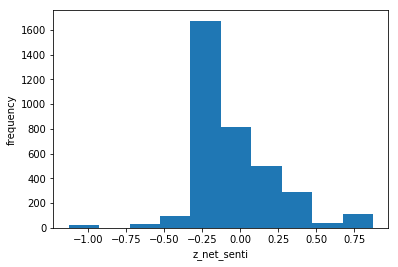

In [203]:
import matplotlib.pyplot as plt
plt.hist(dfcount["z_net_senti"])
plt.ylabel('frequency')
plt.xlabel('z_net_senti')

plt.show()

In [72]:
reviews_list
import nltk
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import PunktSentenceTokenizer
sentences = nltk.sent_tokenize(reviews)   
 
data = []
for sent in sentences:
    data = data + nltk.pos_tag(nltk.word_tokenize(sent))
 
for word in data: 
    if 'NNP' in word[1]: 
        print(word)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\akhta\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
('Google', 'NNP')
("'Functionality", 'NNP')
('Cadence', 'NNP')
('Chrome', 'NNP')
("'great", 'NNP')
('Salesforce', 'NNP')
('Mail', 'NNP')
('Merge', 'NNP')
("'vvv", 'NNP')
('SFDC', 'NNP')
('Gmail', 'NNP')
('Salesforce.com', 'NNP')
('App', 'NNP')
('SalesForce', 'NNP')
('Yesware', 'NNP')
('There\\', 'NNP')
('CSV', 'NNP')
("'f", 'NNP')
('Yesware', 'NNP')
('Salesforce', 'NNP')
('Calendar', 'NNP')
('IP', 'NNP')
('Google', 'NNP')
('China', 'NNP')
('Yesware', 'NNP')
('UI', 'NNP')
('Great', 'NNP')
('Yesware', 'NNP')
("'i", 'NNP')
('YW', 'NNP')
('Hi', 'NNP')
('ItÂ´s', 'NNP')
('CRM', 'NNP')
('Thanks', 'NNP')
("'Great", 'NNP')
('Mail', 'NNP')
('Yesware', 'NNP')
('I\\', 'NNP')
('It\\', 'NNP')
('Ease', 'NNP')
('Ease', 'NNP')
('It\\', 'NNP')
("'accuracy", 'NNP')
("'practicality", 'NNP')
("'Gr

('Salesforce', 'NNP')
('It\\', 'NNP')
('From', 'NNP')
('Easy', 'NNP')
('User', 'NNP')
('Salesforce', 'NNP')
("Couldn\\'t", 'NNP')
('G', 'NNP')
('Suite', 'NNP')
('Yesware', 'NNP')
('Yesware', 'NNP')
('Yesware', 'NNP')
('HubSpots', 'NNP')
('HubSpot', 'NNP')
('YesWare', 'NNP')
('Editor', 'NNP')
('Speeds', 'NNP')
('Pretty', 'NNP')
("'Yesware", 'NNP')
('Yesware', 'NNP')
("Doesn\\'t", 'NNP')
('There\\', 'NNP')
('YesWare', 'NNP')
('That\\', 'NNP')
('Accuracy', 'NNP')
('Please', 'NNP')
('Thanks', 'NNP')
('AND', 'NNP')
('Salesforce', 'NNP')
('Gmail', 'NNP')
("'Great", 'NNP')
('SFDC', 'NNP')
('Yesware', 'NNP')
('UI', 'NNP')
('Makes', 'NNP')
('Helps', 'NNP')
('Apple', 'NNP')
('Firefox', 'NNP')
('Yesware', 'NNP')
('Yesware', 'NNP')
('Tracking', 'NNP')
('Yesware', 'NNP')
('Gmail', 'NNP')
('Yesware', 'NNP')
('YesWare', 'NNP')
('Salesforce', 'NNP')
('Salesforce', 'NNP')
('Yesware', 'NNP')
('It\\', 'NNP')
('Easy', 'NNP')
('Good', 'NNP')
('Yesware', 'NNP')
("'asdf", 'NNP')
('MaiiTrack', 'NNP')
("'Great

In [123]:
df.head()

AttributeError: head not found

In [94]:
df['text length'] = df['NPS_COMMENT'].apply(len)

In [95]:
df['text length'].head()

0    59
3    64
4    13
5    97
7    75
Name: text length, dtype: int64

In [99]:
import seaborn as sns

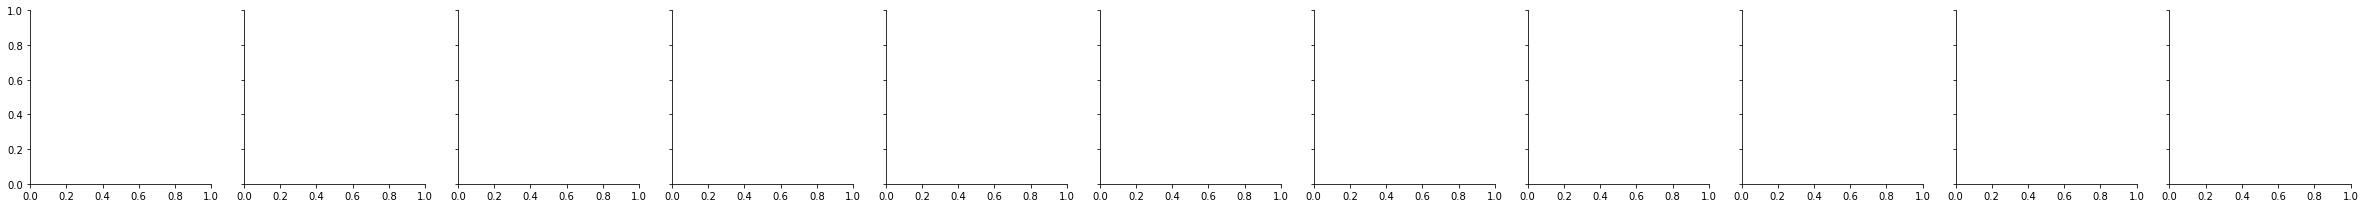

In [100]:
g = sns.FacetGrid(data=df, col='NPS_SCORE')

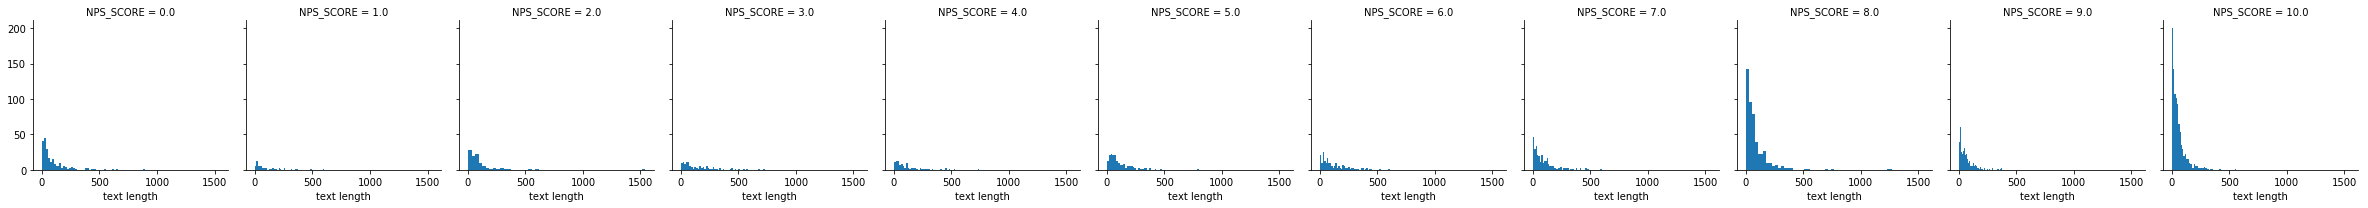

In [102]:
g = sns.FacetGrid(data=df, col='NPS_SCORE')
g.map(plt.hist, 'text length', bins=50)

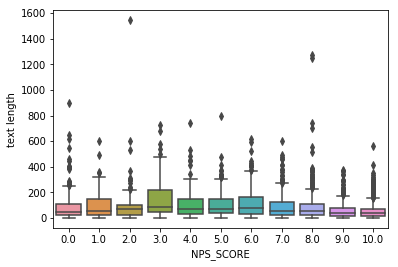

In [103]:
sns.boxplot(x='NPS_SCORE', y='text length', data=df)

In [110]:
import string
def text_process(df):

    nopunc = [char for char in df if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [113]:
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer = CountVectorizer(analyzer=text_process).fit(df)
len(bow_transformer.vocabulary_)


16

In [118]:
bow_25 = bow_transformer.transform(df)
bow_25 

<15x16 sparse matrix of type '<class 'numpy.int64'>'
	with 16 stored elements in Compressed Sparse Row format>

In [125]:
df = bow_transformer.transform(df)


In [136]:
NPS = df.groupby('NPS_SCORE').mean()
NPS.corr()

,USER_ID,IsGmail,HasAccountMgr,USA,EMPLOYEE_COUNT,Tenure,text length
USER_ID,1.000000,-0.446501,-0.544503,-0.593461,0.328419,0.175870,0.260518
IsGmail,-0.446501,1.000000,0.266754,0.677618,-0.195695,-0.324283,-0.660562
HasAccountMgr,-0.544503,0.266754,1.000000,0.529828,0.146430,-0.010773,0.069045
USA,-0.593461,0.677618,0.529828,1.000000,-0.276779,-0.514969,-0.349462
EMPLOYEE_COUNT,0.328419,-0.195695,0.146430,-0.276779,1.000000,0.646213,0.207595
Tenure,0.175870,-0.324283,-0.010773,-0.514969,0.646213,1.000000,0.070035
text length,0.260518,-0.660562,0.069045,-0.349462,0.207595,0.070035,1.000000


In [135]:
df['text length'] = df['NPS_COMMENT'].apply(len)
df.head()

,USER_ID,SENT_AT,NPS_SCORE,NPS_COMMENT,MAILBOX_TYPE,IsGmail,ACCOUNT_MANAGER,HasAccountMgr,COUNTRY_TYPE,USA,EMPLOYEE_COUNT,INDUSTRY,SUBSCRIPTION_START_DATE,Tenure,text length
0,2738.0,3/12/2018,9.0,Will definitely recommend this tool to my sale...,Gmail,1,False,0,International,0,650.0,Internet Software & Services,7/21/2018,-131.031840,59
3,4209.0,3/12/2018,10.0,love the email template feature to fill in nam...,Gmail,1,False,0,United States,1,2240.0,Internet Software & Services,5/3/2018,-51.449259,64
4,3247.0,3/12/2018,10.0,yesware rocks,Gmail,1,False,0,United States,1,850.0,Air Freight & Logistics,2/7/2017,398.551076,13
5,3314.0,3/12/2018,10.0,easy tool for tracking and send mass emails on...,Gmail,1,False,0,International,0,470.0,Internet Software & Services,5/2/2017,314.551111,97
7,979.0,3/12/2018,7.0,couple of things could be improved and some un...,Gmail,1,False,0,United States,1,45.0,Diversified Consumer Services,5/2/2016,679.551169,75


In [134]:
df['NPS_COMMENT']
df = df.dropna(subset=['NPS_COMMENT'])
df['NPS_COMMENT']

0       Will definitely recommend this tool to my sale...
3       love the email template feature to fill in nam...
4                                           yesware rocks
5       easy tool for tracking and send mass emails on...
7       couple of things could be improved and some un...
8                email tracking doesnt work half the time
9                             UI can be clunky in Google.
10                 It works really well and saves me time
12                                    Not always accurate
13                                          Functionality
14                                      Ease of tracking.
16      The Cadence management feels clunky still- if ...
17      As an administrator, it's just a bit clunky. I...
19                                                      -
20      It constantly disconnects from my gmail accoun...
26      Do not find it as useful in my accounts. Somet...
30                              works well - does its job
31      All of

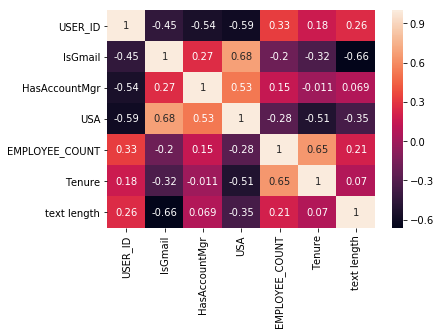

In [137]:
sns.heatmap(data=NPS.corr(), annot=True)


In [197]:
from sklearn.model_selection import train_test_split


In [199]:
df.head()

,Review Text,pos_senti,neg_senti,net_senti,z_net_senti
0,Will definitely recommend this tool to my sale...,0.000000,0.0,0.000000,-0.127892
1,love the email template feature to fill in nam...,0.142857,0.0,0.142857,0.014965
2,yesware rocks,0.000000,0.0,0.000000,-0.127892
3,easy tool for tracking and send mass emails on...,0.181818,0.0,0.181818,0.053926
4,couple of things could be improved and some un...,0.125000,0.0,0.125000,-0.002892


In [220]:
df['NPS_COMMENT']

0       Will definitely recommend this tool to my sale...
1                                                     NaN
2                                                     NaN
3       love the email template feature to fill in nam...
4                                           yesware rocks
5       easy tool for tracking and send mass emails on...
6                                                     NaN
7       couple of things could be improved and some un...
8                email tracking doesnt work half the time
9                             UI can be clunky in Google.
10                 It works really well and saves me time
11                                                    NaN
12                                    Not always accurate
13                                          Functionality
14                                      Ease of tracking.
15                                                    NaN
16      The Cadence management feels clunky still- if ...
17      As an 

In [219]:
rl=[]

for i in df['NPS_COMMENT']:
    if i!='':
        rl.append(i)
        
df['NPS_COMMENT']=rl

In [245]:
X=df['NPS_COMMENT']
Y=df['NPS_SCORE']

In [246]:
import string
def text_process(text):
    '''
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Return the cleaned text as a list of words
    '''
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [244]:
df['text length'] = df['NPS_COMMENT'].apply(len)
df.head()

,USER_ID,SENT_AT,NPS_SCORE,NPS_COMMENT,MAILBOX_TYPE,IsGmail,ACCOUNT_MANAGER,HasAccountMgr,COUNTRY_TYPE,USA,EMPLOYEE_COUNT,INDUSTRY,SUBSCRIPTION_START_DATE,Tenure,text length
0,2738.0,3/12/2018,9.0,Will definitely recommend this tool to my sale...,Gmail,1,False,0,International,0,650.0,Internet Software & Services,7/21/2018,-131.031840,59
3,4209.0,3/12/2018,10.0,love the email template feature to fill in nam...,Gmail,1,False,0,United States,1,2240.0,Internet Software & Services,5/3/2018,-51.449259,64
4,3247.0,3/12/2018,10.0,yesware rocks,Gmail,1,False,0,United States,1,850.0,Air Freight & Logistics,2/7/2017,398.551076,13
5,3314.0,3/12/2018,10.0,easy tool for tracking and send mass emails on...,Gmail,1,False,0,International,0,470.0,Internet Software & Services,5/2/2017,314.551111,97
7,979.0,3/12/2018,7.0,couple of things could be improved and some un...,Gmail,1,False,0,United States,1,45.0,Diversified Consumer Services,5/2/2016,679.551169,75


In [264]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(X)


In [265]:
len(bow_transformer.vocabulary_)


3471

In [266]:
X = bow_transformer.transform(X)


In [267]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [268]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [269]:
preds = nb.predict(X_test)


In [270]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, preds))
print('\n')
print(classification_report(y_test, preds))

[[123 104]
 [ 45 385]]


             precision    recall  f1-score   support

          0       0.73      0.54      0.62       227
          1       0.79      0.90      0.84       430

avg / total       0.77      0.77      0.76       657



In [257]:
import numpy as np

In [262]:
df['PosNeg'] = np.where(df['NPS_SCORE']>=7, 1, 0)

In [263]:
X=df['NPS_COMMENT']
Y=df['PosNeg']

ModuleNotFoundError: No module named 'keras'

In [257]:
import numpy as np

In [164]:
df['PosNeg'] = np.where(df['NPS_SCORE']>=7, 1, 0)

In [165]:
X=df['NPS_COMMENT']
Y=df['PosNeg']

In [1]:
import keras

Using TensorFlow backend.


In [20]:
import textblob
import numpy as np

In [17]:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [29]:
df.head()
df['len']  = (df['NPS_COMMENT'].str.len())
df.head()

,USER_ID,SENT_AT,NPS_SCORE,NPS_COMMENT,MAILBOX_TYPE,IsGmail,ACCOUNT_MANAGER,HasAccountMgr,COUNTRY_TYPE,USA,EMPLOYEE_COUNT,INDUSTRY,SUBSCRIPTION_START_DATE,Tenure,len
0,2738.0,3/12/2018,9.0,Will definitely recommend this tool to my sale...,Gmail,1,False,0,International,0,650.0,Internet Software & Services,7/21/2018,-131.031840,59.0
1,2190.0,3/12/2018,10.0,NaN,Gmail,1,True,1,International,0,NaN,NaN,2/8/2018,32.270602,NaN
2,4390.0,3/12/2018,5.0,NaN,Outlook,0,False,0,United States,1,120.0,Professional Services,2/7/2018,33.463947,NaN
3,4209.0,3/12/2018,10.0,love the email template feature to fill in nam...,Gmail,1,False,0,United States,1,2240.0,Internet Software & Services,5/3/2018,-51.449259,64.0
4,3247.0,3/12/2018,10.0,yesware rocks,Gmail,1,False,0,United States,1,850.0,Air Freight & Logistics,2/7/2017,398.551076,13.0


In [36]:
mean = np.mean(df['len'])
print(mean)

82.16


In [147]:
from textblob import TextBlob


def analize_sentiment(a):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob((a))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [55]:
df['NPS_COMMENT'] = df['NPS_COMMENT'].astype('str') 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6321 entries, 0 to 6320
Data columns (total 16 columns):
USER_ID                    6229 non-null float64
SENT_AT                    6229 non-null object
NPS_SCORE                  6229 non-null float64
NPS_COMMENT                6321 non-null object
MAILBOX_TYPE               6229 non-null object
IsGmail                    6321 non-null int64
ACCOUNT_MANAGER            6226 non-null object
HasAccountMgr              6321 non-null int64
COUNTRY_TYPE               6229 non-null object
USA                        6321 non-null int64
EMPLOYEE_COUNT             4485 non-null float64
INDUSTRY                   5083 non-null object
SUBSCRIPTION_START_DATE    6224 non-null object
Tenure                     6321 non-null float64
len                        3125 non-null float64
SA                         6321 non-null int32
dtypes: float64(5), int32(1), int64(3), object(7)
memory usage: 765.5+ KB


In [140]:
df['SA'] = np.array([ nb.predict(a) for a in df['NPS_COMMENT'] ])
df.head(10)



SyntaxError: invalid syntax (<ipython-input-140-943cde85ba24>, line 5)

In [60]:
pos = [ a for b, a in enumerate(df['NPS_COMMENT']) if df['SA'][b] > 0]
neu = [ a for b, a in enumerate(df['NPS_COMMENT']) if df['SA'][b] == 0]
neg= [ a for b, a in enumerate(df['NPS_COMMENT']) if df['SA'][b] < 0]

In [61]:
print("Percentage of positive review: {}%".format(len(pos)*100/len(df['NPS_COMMENT'])))
print("Percentage of neutral review: {}%".format(len(neu)*100/len(df['NPS_COMMENT'])))
print("Percentage de negative review: {}%".format(len(neg)*100/len(df['NPS_COMMENT'])))

Percentage of positive review: 25.692137320044296%
Percentage of neutral review: 68.78658440120235%
Percentage de negative review: 5.521278278753361%


In [62]:
del df['NPS_COMMENT']

In [ ]:
df['SA'] = np.array([ analize_sentiment(a) for a in df['NPS_COMMENT'] ])
df.head(10)

In [149]:
def sentiment_calc(text): 
    try: 
        return TextBlob(text).sentiment 
    except: 
        return None 
df['sentiment'] = df['NPS_COMMENT'].apply(sentiment_calc)

In [155]:
df.head(20)

,USER_ID,SENT_AT,NPS_SCORE,NPS_COMMENT,MAILBOX_TYPE,IsGmail,ACCOUNT_MANAGER,HasAccountMgr,COUNTRY_TYPE,USA,EMPLOYEE_COUNT,INDUSTRY,SUBSCRIPTION_START_DATE,Tenure,sentiment
0,2738.0,3/12/2018,9.0,Will definitely recommend this tool to my sale...,Gmail,1,False,0,International,0,650.0,Internet Software & Services,7/21/2018,-131.031840,"(0.0, 0.5)"
1,2190.0,3/12/2018,10.0,NaN,Gmail,1,True,1,International,0,NaN,NaN,2/8/2018,32.270602,None
2,4390.0,3/12/2018,5.0,NaN,Outlook,0,False,0,United States,1,120.0,Professional Services,2/7/2018,33.463947,None
3,4209.0,3/12/2018,10.0,love the email template feature to fill in nam...,Gmail,1,False,0,United States,1,2240.0,Internet Software & Services,5/3/2018,-51.449259,"(0.171875, 0.4875)"
4,3247.0,3/12/2018,10.0,yesware rocks,Gmail,1,False,0,United States,1,850.0,Air Freight & Logistics,2/7/2017,398.551076,"(0.0, 0.0)"
5,3314.0,3/12/2018,10.0,easy tool for tracking and send mass emails on...,Gmail,1,False,0,International,0,470.0,Internet Software & Services,5/2/2017,314.551111,"(0.39444444444444443, 0.7444444444444445)"
6,1775.0,3/12/2018,10.0,NaN,Outlook,0,True,1,United States,1,1150.0,Professional Services,7/11/2017,244.551146,None
7,979.0,3/12/2018,7.0,couple of things could be improved and some un...,Gmail,1,False,0,United States,1,45.0,Diversified Consumer Services,5/2/2016,679.551169,"(0.0, 0.0)"
8,3915.0,3/12/2018,2.0,email tracking doesnt work half the time,Gmail,1,False,0,United States,1,130.0,Internet Software & Services,1/31/2017,405.551192,"(-0.16666666666666666, 0.16666666666666666)"
9,5444.0,3/12/2018,7.0,UI can be clunky in Google.,Gmail,1,False,0,United States,1,30.0,Beverages,8/17/2017,207.551250,"(0.0, 0.0)"


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


In [6]:
from sklearn.model_selection import train_test_split


In [7]:
from sklearn.preprocessing import StandardScaler


In [8]:
import keras
from keras.models import Sequential
from keras.layers import Dense


Using TensorFlow backend.


In [9]:
import nltk
from nltk.corpus import stopwords


In [54]:
dataset = pd.read_csv(r'C:\Users\akhta\Downloads\EditedNewData.csv')
dataset.head()

,USER_ID,SENT_AT,NPS_SCORE,NPS_COMMENT,MAILBOX_TYPE,IsGmail,ACCOUNT_MANAGER,HasAccountMgr,COUNTRY_TYPE,USA,EMPLOYEE_COUNT,INDUSTRY,SUBSCRIPTION_START_DATE,Tenure
0,2738.0,3/12/2018,9.0,Will definitely recommend this tool to my sale...,Gmail,1,False,0,International,0,650.0,Internet Software & Services,7/21/2018,-131.031840
1,2190.0,3/12/2018,10.0,NaN,Gmail,1,True,1,International,0,NaN,NaN,2/8/2018,32.270602
2,4390.0,3/12/2018,5.0,NaN,Outlook,0,False,0,United States,1,120.0,Professional Services,2/7/2018,33.463947
3,4209.0,3/12/2018,10.0,love the email template feature to fill in nam...,Gmail,1,False,0,United States,1,2240.0,Internet Software & Services,5/3/2018,-51.449259
4,3247.0,3/12/2018,10.0,yesware rocks,Gmail,1,False,0,United States,1,850.0,Air Freight & Logistics,2/7/2017,398.551076


In [25]:
dataset.iloc[:,2]

0        9.0
1       10.0
2        5.0
3       10.0
4       10.0
5       10.0
6       10.0
7        7.0
8        2.0
9        7.0
10       9.0
11      10.0
12       4.0
13       2.0
14      10.0
15       0.0
16       6.0
17       6.0
18       9.0
19       7.0
20       2.0
21       1.0
22       8.0
23       9.0
24       8.0
25       7.0
26       4.0
27       2.0
28       8.0
29       1.0
        ... 
6291     NaN
6292     NaN
6293     NaN
6294     NaN
6295     NaN
6296     NaN
6297     NaN
6298     NaN
6299     NaN
6300     NaN
6301     NaN
6302     NaN
6303     NaN
6304     NaN
6305     NaN
6306     NaN
6307     NaN
6308     NaN
6309     NaN
6310     NaN
6311     NaN
6312     NaN
6313     NaN
6314     NaN
6315     NaN
6316     NaN
6317     NaN
6318     NaN
6319     NaN
6320     NaN
Name: NPS_SCORE, Length: 6321, dtype: float64

In [11]:
rl=[]

for i in dataset['NPS_COMMENT']:
    if i!='':
        rl.append(i)
        
dataset['NPS_COMMENT']=rl

In [28]:
X=dataset['NPS_COMMENT']
Y=dataset['NPS_SCORE']

In [12]:
import string
def text_process(text):
    '''
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Return the cleaned text as a list of words
    '''
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [13]:
import seaborn as sns

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer = CountVectorizer(analyzer=text_process).fit(dataset)
len(bow_transformer.vocabulary_)

14

In [15]:
dataset['text length'] = dataset['NPS_COMMENT'].apply(len)
dataset.head()

TypeError: object of type 'float' has no len()

In [16]:
bow_25 = bow_transformer.transform(dataset)
bow_25 

<14x14 sparse matrix of type '<class 'numpy.int64'>'
	with 14 stored elements in Compressed Sparse Row format>

In [17]:
dataset = dataset.dropna(subset=['NPS_COMMENT'])
dataset.head()

,USER_ID,SENT_AT,NPS_SCORE,NPS_COMMENT,MAILBOX_TYPE,IsGmail,ACCOUNT_MANAGER,HasAccountMgr,COUNTRY_TYPE,USA,EMPLOYEE_COUNT,INDUSTRY,SUBSCRIPTION_START_DATE,Tenure
0,2738.0,3/12/2018,9.0,Will definitely recommend this tool to my sale...,Gmail,1,False,0,International,0,650.0,Internet Software & Services,7/21/2018,-131.031840
3,4209.0,3/12/2018,10.0,love the email template feature to fill in nam...,Gmail,1,False,0,United States,1,2240.0,Internet Software & Services,5/3/2018,-51.449259
4,3247.0,3/12/2018,10.0,yesware rocks,Gmail,1,False,0,United States,1,850.0,Air Freight & Logistics,2/7/2017,398.551076
5,3314.0,3/12/2018,10.0,easy tool for tracking and send mass emails on...,Gmail,1,False,0,International,0,470.0,Internet Software & Services,5/2/2017,314.551111
7,979.0,3/12/2018,7.0,couple of things could be improved and some un...,Gmail,1,False,0,United States,1,45.0,Diversified Consumer Services,5/2/2016,679.551169


In [24]:
from sklearn.model_selection import train_test_split


In [39]:
dataset['PosNeg1'] = np.where(dataset['NPS_SCORE']>=7, 1, 0)

In [40]:
X=dataset['NPS_COMMENT']
Y1=dataset['PosNeg1']

In [27]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(X)


In [173]:
len(bow_transformer.vocabulary_)


4337

In [41]:
X = bow_transformer.transform(X)


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, Y1, test_size=0.3, random_state=101)

In [49]:
print(X_train[6])


  (0, 4309)	1
  (0, 3849)	1
  (0, 1923)	1
  (0, 1783)	1
  (0, 1478)	1
  (0, 1134)	1
  (0, 958)	1


In [53]:
print(X_train)

  (0, 4110)	1
  (0, 3510)	1
  (0, 3268)	1
  (0, 2984)	1
  (0, 2440)	1
  (0, 1589)	1
  (0, 1233)	1
  (0, 936)	1
  (1, 4186)	1
  (1, 3491)	1
  (1, 3238)	1
  (1, 739)	1
  (2, 4136)	1
  (2, 1829)	1
  (3, 2634)	1
  (3, 1393)	1
  (3, 189)	1
  (4, 4283)	1
  (4, 1023)	1
  (5, 4136)	1
  (5, 304)	1
  (6, 4309)	1
  (6, 3849)	1
  (6, 1923)	1
  (6, 1783)	1
  :	:
  (2178, 936)	1
  (2178, 649)	1
  (2179, 4283)	1
  (2179, 4229)	1
  (2180, 129)	1
  (2181, 488)	1
  (2182, 3910)	1
  (2182, 3519)	1
  (2182, 3387)	1
  (2182, 2276)	1
  (2182, 2096)	1
  (2182, 1623)	1
  (2182, 949)	1
  (2182, 405)	1
  (2183, 4140)	1
  (2183, 2158)	1
  (2184, 3944)	1
  (2184, 1403)	1
  (2184, 288)	1
  (2185, 4022)	1
  (2185, 1865)	1
  (2186, 4136)	1
  (2186, 2654)	1
  (2186, 2211)	1
  (2186, 1783)	1


In [43]:
vocabulary_size = 5000


In [44]:
from sklearn.neural_network import MLPClassifier

In [48]:
clf = MLPClassifier(solver='lbfgs', activation='tanh',alpha=0.000001,hidden_layer_sizes=(3,2,7),max_iter=2000,random_state=1)

clf.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=1e-06, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(3, 2, 7), learning_rate='constant',
       learning_rate_init=0.001, max_iter=2000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [147]:
parameter_space = {
    'hidden_layer_sizes': [(3,2,7), (5,5,9), (3,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam','lbfgs'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [201]:
#from sklearn.model_selection import GridSearchCV
#mlp = MLPClassifier(max_iter=100)

#clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
#clf.fit(X_train, y_train)

In [98]:
#print('Best parameters found:\n', clf.best_params_)

# All results
#means = clf.cv_results_['mean_test_score']
#stds = clf.cv_results_['std_test_score']
#for mean, std, params in zip(means, stds, clf.cv_results_['params']):
#    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

In [49]:
y_true, y_pred = y_test , clf.predict(X_test)

from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

Results on the test set:
              precision    recall  f1-score   support

           0       0.60      0.59      0.59       285
           1       0.82      0.83      0.83       653

   micro avg       0.76      0.76      0.76       938
   macro avg       0.71      0.71      0.71       938
weighted avg       0.76      0.76      0.76       938



In [155]:
X_train[2]

<1x4337 sparse matrix of type '<class 'numpy.int64'>'
	with 2 stored elements in Compressed Sparse Row format>

In [35]:
y_pred = clf.predict(X_test)
#y_pred = (y_pred > 0.5)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 87,  85],
       [ 83, 683]], dtype=int64)

In [36]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

[[ 87  85]
 [ 83 683]]


              precision    recall  f1-score   support

           0       0.51      0.51      0.51       172
           1       0.89      0.89      0.89       766

   micro avg       0.82      0.82      0.82       938
   macro avg       0.70      0.70      0.70       938
weighted avg       0.82      0.82      0.82       938



In [158]:
X_train[6]

<1x4337 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [166]:
dataset.head()

,USER_ID,SENT_AT,NPS_SCORE,NPS_COMMENT,MAILBOX_TYPE,IsGmail,ACCOUNT_MANAGER,HasAccountMgr,COUNTRY_TYPE,USA,EMPLOYEE_COUNT,INDUSTRY,SUBSCRIPTION_START_DATE,Tenure,PosNeg
0,2738.0,3/12/2018,9.0,Will definitely recommend this tool to my sale...,Gmail,1,False,0,International,0,650.0,Internet Software & Services,7/21/2018,-131.031840,1
3,4209.0,3/12/2018,10.0,love the email template feature to fill in nam...,Gmail,1,False,0,United States,1,2240.0,Internet Software & Services,5/3/2018,-51.449259,1
4,3247.0,3/12/2018,10.0,yesware rocks,Gmail,1,False,0,United States,1,850.0,Air Freight & Logistics,2/7/2017,398.551076,1
5,3314.0,3/12/2018,10.0,easy tool for tracking and send mass emails on...,Gmail,1,False,0,International,0,470.0,Internet Software & Services,5/2/2017,314.551111,1
7,979.0,3/12/2018,7.0,couple of things could be improved and some un...,Gmail,1,False,0,United States,1,45.0,Diversified Consumer Services,5/2/2016,679.551169,1


In [1]:
import textblob


In [37]:
from textblob import TextBlob
import re

def clean_X(X):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", X).split())

def analize_sentiment(X):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_X(X))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [50]:
dataset['SA'] = np.array([ analize_sentiment(X) for X in  dataset['NPS_COMMENT']])
dataset.head()

,USER_ID,SENT_AT,NPS_SCORE,NPS_COMMENT,MAILBOX_TYPE,IsGmail,ACCOUNT_MANAGER,HasAccountMgr,COUNTRY_TYPE,USA,EMPLOYEE_COUNT,INDUSTRY,SUBSCRIPTION_START_DATE,Tenure,SA,PosNeg1
0,2738.0,3/12/2018,9.0,Will definitely recommend this tool to my sale...,Gmail,1,False,0,International,0,650.0,Internet Software & Services,7/21/2018,-131.031840,0,1
3,4209.0,3/12/2018,10.0,love the email template feature to fill in nam...,Gmail,1,False,0,United States,1,2240.0,Internet Software & Services,5/3/2018,-51.449259,1,1
4,3247.0,3/12/2018,10.0,yesware rocks,Gmail,1,False,0,United States,1,850.0,Air Freight & Logistics,2/7/2017,398.551076,0,1
5,3314.0,3/12/2018,10.0,easy tool for tracking and send mass emails on...,Gmail,1,False,0,International,0,470.0,Internet Software & Services,5/2/2017,314.551111,1,1
7,979.0,3/12/2018,7.0,couple of things could be improved and some un...,Gmail,1,False,0,United States,1,45.0,Diversified Consumer Services,5/2/2016,679.551169,0,1


In [66]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [51]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use','Yesware',])

In [57]:
rl=[]

for i in df.NPS_COMMENT:
    if i!='':
        rl.append(i)
        
df.NPS_COMMENT=rl

In [63]:
# Convert to list
data = df.NPS_COMMENT.values.tolist()

# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

print(data[:1])

['0 Will definitely recommend this tool to my sale... 1 NaN 2 NaN 3 love the email template feature to fill in nam... 4 yesware rocks 5 easy tool for tracking and send mass emails on... 6 NaN 7 couple of things could be improved and some un... 8 email tracking does not work half the time 9 UI can be clunky in Google. 10 It works really well and saves me time 11 NaN 12 Not always accurate 13 Functionality 14 Ease of tracking. 15 NaN 16 The Cadence management feels clunky still- if ... 17 As an administrator, it is just a bit clunky. I... 18 NaN 19 - 20 It constantly disconnects from my gmail accoun... 21 NaN 22 NaN 23 NaN 24 NaN 25 NaN 26 Do not find it as useful in my accounts. Somet... 27 NaN 28 NaN 29 NaN ... 6291 NaN 6292 NaN 6293 NaN 6294 NaN 6295 NaN 6296 NaN 6297 NaN 6298 NaN 6299 NaN 6300 NaN 6301 NaN 6302 NaN 6303 NaN 6304 NaN 6305 NaN 6306 NaN 6307 NaN 6308 NaN 6309 NaN 6310 NaN 6311 NaN 6312 NaN 6313 NaN 6314 NaN 6315 NaN 6316 NaN 6317 NaN 6318 NaN 6319 NaN 6320 NaN Name: NPS

In [67]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['will', 'definitely', 'recommend', 'this', 'tool', 'to', 'my', 'sale', 'nan', 'nan', 'love', 'the', 'email', 'template', 'feature', 'to', 'fill', 'in', 'nam', 'yesware', 'rocks', 'easy', 'tool', 'for', 'tracking', 'and', 'send', 'mass', 'emails', 'on', 'nan', 'couple', 'of', 'things', 'could', 'be', 'improved', 'and', 'some', 'un', 'email', 'tracking', 'does', 'not', 'work', 'half', 'the', 'time', 'ui', 'can', 'be', 'clunky', 'in', 'google', 'it', 'works', 'really', 'well', 'and', 'saves', 'me', 'time', 'nan', 'not', 'always', 'accurate', 'functionality', 'ease', 'of', 'tracking', 'nan', 'the', 'cadence', 'management', 'feels', 'clunky', 'still', 'if', 'as', 'an', 'administrator', 'it', 'is', 'just', 'bit', 'clunky', 'nan', 'it', 'constantly', 'disconnects', 'from', 'my', 'gmail', 'accoun', 'nan', 'nan', 'nan', 'nan', 'nan', 'do', 'not', 'find', 'it', 'as', 'useful', 'in', 'my', 'accounts', 'somet', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', '

In [7]:
%matplotlib inline
import sys
sys.path.append('../')

import os
import pandas as pd
import numpy # need for gensim with no alias
import matplotlib.pyplot as plt
import string
import re
import logging
from gensim import corpora
from gensim.models import Phrases
from gensim.models.ldamodel import LdaModel
from gensim.models.ldamulticore import LdaMulticore
from gensim.models.coherencemodel import CoherenceModel
import pyLDAvis.gensim
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
os.chdir(r"C:\Users\akhta\Downloads\Marketing_Analytics")

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\akhta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
#specify file location
file = open('Yesware1.txt','r',encoding="utf8")
raw=file.read()
file.close()

# process the text file
lines = raw.splitlines() # split on lines and carriages \n\r
reviews = [line.strip('') for line in lines if '' in line]
print(reviews[:100])

['\ufeffNPS_COMMENT', 'Will definitely recommend this tool to my sales colleagues.', '', '', 'love the email template feature to fill in names and other info!', 'yesware rocks', 'easy tool for tracking and send mass emails on a small scale - perfect when working with clients.', '', 'couple of things could be improved and some uncertainty on way things work.', 'email tracking doesnt work half the time', 'UI can be clunky in Google.', 'It works really well and saves me time', '', 'Not always accurate', 'Functionality', 'Ease of tracking.', '', 'The Cadence management feels clunky still- if this was better it would be higher.', "As an administrator, it's just a bit clunky. I also don't have a good idea of what's being used and success rates.", '', '-', 'It constantly disconnects from my gmail account in Chrome browser.', '', '', '', '', '', 'Do not find it as useful in my accounts. Sometimes can be a hindrance as their security picks up that we are tracking', '', '', '', 'works well - doe

In [13]:
# Utility Functions. adjust bad character list to filter out undesired words
def default_clean(text):
    '''
    Removes default bad characters
    '''
    if not (pd.isnull(text)):
        text = "".join(list(filter(lambda x: x in string.printable, text)))
        bad_chars = set(["@", "+", '<br>', '<br />', '/', "'", '"', '\\',
                        '(',')', '<p>', '\\n', '<', '>', '?', '#', ',',
                        '.', '[',']', '%', '$', '&', ';', '!', ';', ':',
                        '-', "*", "_", "=", "}", "{",
                         "disney","disneyland","baymont","mail","email","great","however"])
        for char in bad_chars:
            text = text.replace(char, " ")
        text = re.sub('\d+', "", text)

    return text

In [14]:
#remove stopwords and stem words
def stop_and_stem(text, stem=True, stemmer = PorterStemmer()):
    '''
    Removes stopwords and does stemming
    '''
    stoplist = stopwords.words('english')

    if stem:
        text_stemmed = [[stemmer.stem(word) for word in document.lower().split()
                            if word not in stoplist] for document in text]
    else:
        text_stemmed = [[word for word in document.lower().split()
                    if word not in stoplist] for document in text]

    return text_stemmed

In [15]:
def make_corpus(parsed_text, bigrams=True, filter_extremes=False, below=5, above=0.1):
    '''
    Prepares corpus and dictionary with options for removing outliers or using bigrams
    '''

    if bigrams:
        bigrams = Phrases(parsed_text)
        corpora_dict = corpora.Dictionary(bigrams[parsed_text])
        parsed_text = bigrams[parsed_text]
    else:
        corpora_dict = corpora.Dictionary(parsed_text)
        
    # Filter the dict to remove redundant words
    if filter_extremes:
        print("Size of dict before filter: ",len(corpora_dict))
        corpora_dict.filter_extremes(no_below=below, no_above=above)
        print("Size of dict after filter: ",len(corpora_dict))


    # Convert the cleaned documents into bag of words
    corpus = [corpora_dict.doc2bow(t) for t in parsed_text]

    return corpora_dict, corpus


def data_transformation(input_data, bigrams=True, stem_flag=True, filter_extremes=False, below=5, above=0.1):
    '''
    Combines all data transformation steps: clean, drop stopwords, stem, make corpus
    '''

    clean_reviews = [default_clean(d).lower() for d in input_data]
    stemmed = stop_and_stem(clean_reviews, stem=stem_flag)
    dictn, data = make_corpus(stemmed, bigrams=bigrams, filter_extremes=filter_extremes, below=below, above=above)

    return data, dictn

In [16]:
# clean up raw reviews and prepare dataset for model
corpus, dictionary = data_transformation(reviews, bigrams=False, stem_flag=False, filter_extremes=True, below=5, above=0.2)

Size of dict before filter:  3425
Size of dict after filter:  848


In [17]:
# some utility functions for running comparisons

def tuple_ith_element(lst, element=1):
    return [x[element] for x in lst]


def split_test_train(crps, test_prop=0.7):
    in_train = numpy.random.choice(len(crps), size=int(len(crps)*test_prop), replace=False)
    tr = [crps[i] for i in  in_train]
    ix = range(len(crps))
    s = set(in_train)
    in_test = [i for i in ix if i not in s]
    ts = [crps[i] for i in in_test]

    return tr, ts


def search_param_space(corpus_iter, dict_iter, parallel=False,
                       metric = 'coherence', ntopics=[5], num_passes=1):
    ''' fit LDA model, with faster option using multicore implementation
        and calculate topic coherence for each K
    '''
    result = dict()

    if metric not in ['coherence', 'log_perplexity']:
        raise ValueError("Metric can only be 'coherence' or 'log_perplexity'")

    #split into training and testing sets
    #train_corpus, test_corpus = split_test_train(corpus_iter)
    
# iterate through topic list and fit a model for each
    for t in ntopics:
        print ("Fitting %s topics..."%t)
        if parallel:
            lda_mod = LdaMulticore(corpus_iter, id2word=dict_iter, num_topics=t, passes=num_passes)
        else:
            lda_mod = LdaModel(corpus_iter, id2word=dict_iter, num_topics=t, alpha='auto', passes=num_passes)

        if metric=='coherence':
            topic_coh = tuple_ith_element(lda_mod.top_topics(corpus_iter, topn=20))
            result[str(t)] = numpy.mean(topic_coh)
        elif metric=='log_perplexity':
            result[str(t)] = lda_mod.log_perplexity(corpus_iter)

    return result


In [23]:
%%time
#choose range of topic dimensions to investigate
topic_search = numpy.arange(1,10)
print (topic_search)


topic_coherence = search_param_space(corpus, dictionary, parallel=True,
                                     metric='coherence', ntopics=topic_search, num_passes=10)

[1 2 3 4 5 6 7 8 9]
Fitting 1 topics...
Fitting 2 topics...
Fitting 3 topics...
Fitting 4 topics...
Fitting 5 topics...
Fitting 6 topics...
Fitting 7 topics...
Fitting 8 topics...
Fitting 9 topics...
Wall time: 2min 17s


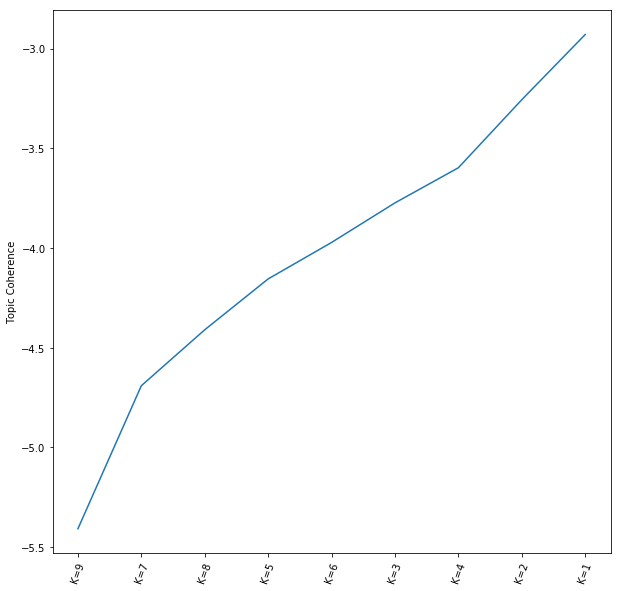

In [24]:
#plot topic coherence graph to help select number of topics
plt.rcParams['figure.figsize'] = (10,10)

x = tuple_ith_element(sorted(topic_coherence.items(), key=lambda x: x[1]))
labels = tuple_ith_element(sorted(topic_coherence.items(), key=lambda x: x[1]),0)
xticklabels = ['K='+t.replace('_auto','') for t in labels ]
plt.plot(range(len(x)), x)
plt.xticks(range(len(x)), xticklabels, rotation=70)
plt.ylabel('Topic Coherence')
plt.show()

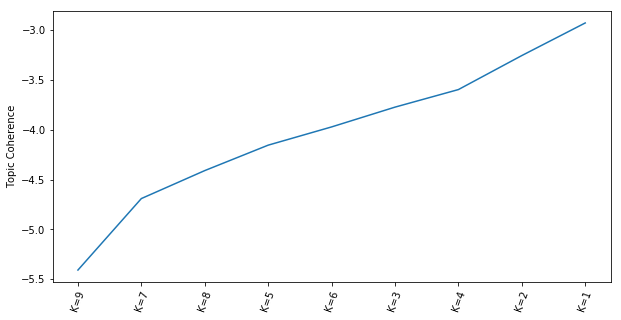

In [25]:
#plot topic coherence graph to help select number of topics
plt.rcParams['figure.figsize'] = (10,5)
x = tuple_ith_element(sorted(topic_coherence.items(), key=lambda x: x[1]))
labels = tuple_ith_element(sorted(topic_coherence.items(), key=lambda x: x[1]),0)
xticklabels = ['K='+t.replace('_auto','') for t in labels ]
plt.plot(range(len(x)), x)
plt.xticks(range(len(x)), xticklabels, rotation=70)
plt.ylabel('Topic Coherence')
plt.show()

In [33]:
%%time
numpy.random.seed(seed=44)

# choose number of topics according to topic coherence graph
K=7

# Run LDA model to extract topics
lda = LdaModel(corpus=corpus, id2word=dictionary, num_topics=K, alpha='auto', passes=10)

Wall time: 21.2 s


In [34]:
# let's display the topics, represented by top 10 most probable words
lda.show_topics(K, num_words=10, formatted=False)

[(0,
  [('service', 0.051189322),
   ('product', 0.042286973),
   ('great', 0.040585395),
   ('functionality', 0.0344311),
   ('good', 0.027338674),
   ('merge', 0.022018805),
   ('customer', 0.021587087),
   ('support', 0.01927819),
   ('yesware', 0.018742545),
   ('time', 0.018512668)]),
 (1,
  [('use', 0.21493475),
   ('easy', 0.073194645),
   ('love', 0.04822099),
   ('ease', 0.044528328),
   ('templates', 0.031075595),
   ('tool', 0.025897643),
   ('helpful', 0.018959628),
   ('sales', 0.018719997),
   ('follow', 0.017762009),
   ('reminders', 0.016705813)]),
 (2,
  [('good', 0.05967205),
   ('yesware', 0.026804404),
   ('many', 0.024814587),
   ('received', 0.022218106),
   ('find', 0.020781208),
   ('know', 0.01972341),
   ('sending', 0.019409526),
   ('useful', 0.01623522),
   ('much', 0.015161099),
   ('conversation', 0.01389194)]),
 (3,
  [('e', 0.045753837),
   ('ability', 0.02564238),
   ('get', 0.024714692),
   ('would', 0.02449746),
   ('see', 0.023772905),
   ('campaigns

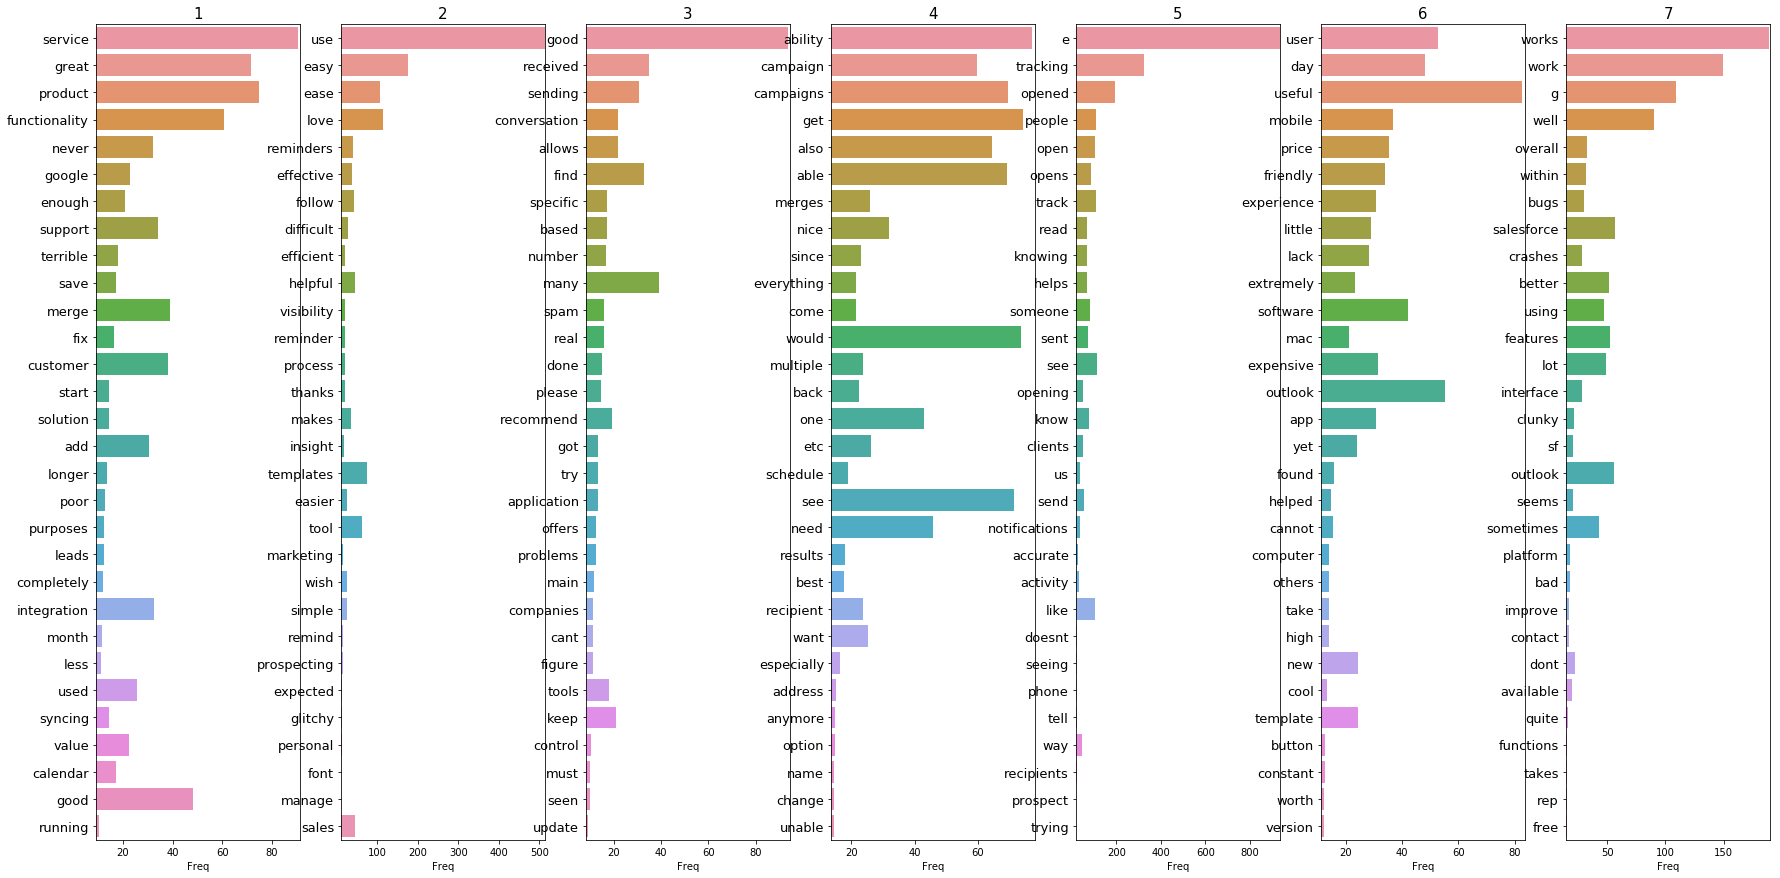

In [35]:
import seaborn as sns

# get term relevance
viz = pyLDAvis.gensim.prepare(lda, corpus, dictionary, sort_topics=False)

#change names to best match topics, adjust number of names to match number of topics
name_dict = {   0: "1", # 1 on the chart
                1: "2",    # 2 on the chart
                2: "3",  # 3 on the chart
                3: "4",           
                4: "5",
                5: "6",    # 2 on the chart
                6: "7"}

for_viz = {}

# specify parameter
lambda_ = 0.4

viz_data = viz.topic_info
viz_data['relevance'] = lambda_ * viz_data['logprob'] + (1 - lambda_) * viz_data['loglift']

# plot the terms
plt.rcParams['figure.figsize'] = [30, 15]
#change ncols to match number of identified topics
fig, ax_ = plt.subplots(nrows=1, ncols=7)
ax = ax_.flatten()

for j in range(lda.num_topics):
    df = viz.topic_info[viz.topic_info.Category=='Topic'+str(j+1)].sort_values(by='relevance', ascending=False).head(30)

    df.set_index(df['Term'], inplace=True)
    sns.barplot(y="Term", x="Freq",  data=df, ax = ax[j])
    sns.set_style({"axes.grid": False})

    ax[j].set_xlim([df['Freq'].min()-1, df['Freq'].max()+1])
    ax[j].set_ylabel('')
    ax[j].set_title(name_dict[j], size=15)
    ax[j].tick_params(axis='y', labelsize=13)